In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('cwdata_cleaned.csv')

In [3]:
df.head()

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,76300,RURAL,1,1,BMW,3 SERIES,1,25,BLACK,1
1,52340,RURAL,0,1,MERCEDES,C CLASS,0,25,GREY,1
2,150600,RURAL,1,1,BMW,3 SERIES,0,19,WHITE,1
3,50000,RURAL,1,1,VOLKSWAGON,GOLF,1,55,BLACK,1
4,15000,RURAL,1,1,PEUGEOT,107,0,54,YELLOW,0


1. Separate the features (X) from the target variable (y).
2. Convert the categorical features into numerical representations if necessary.
3. Split the dataset into training and testing sets.
4. Scale the features using StandardScaler, which is important for SVM.
5. Train an SVM model.

Excluding Non-Numeric Features:
* Pros:
Simplifies the preprocessing pipeline: By excluding non-numeric features, you avoid the need for encoding or scaling them, which can simplify your code and reduce the risk of errors.
Avoids potential issues with encoding: Certain encoding methods (e.g., one-hot encoding) can introduce high dimensionality or sparsity, which may not be ideal for some algorithms.
* Cons:
Loss of information: Non-numeric features may contain valuable information that could improve model performance if properly encoded.
Reduction in feature space: Excluding non-numeric features reduces the overall feature space, potentially limiting the model's ability to capture complex patterns.

Encoding Non-Numeric Features:
* Pros:
Retains valuable information: Encoding non-numeric features allows the model to utilize all available information in the dataset, potentially improving performance.
Maintains feature space: Encoding preserves the original feature space, which can be beneficial for algorithms that rely on feature interactions.
* Cons:
Increased complexity: Encoding non-numeric features adds complexity to the preprocessing pipeline, requiring additional steps such as one-hot encoding or label encoding.
Potential issues with certain algorithms: Some algorithms may not perform well with encoded categorical variables, or certain encoding methods may introduce undesirable properties (e.g., multicollinearity).

In [4]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Stolen'])  # Features
y = df['Stolen']  # Target variable

In [5]:
# Step 1: Label Encode Categorical Features
label_encoder = LabelEncoder()
X_encoded = X.copy()
for column in X.columns:
    if X[column].dtype == 'object':
        X_encoded[column] = label_encoder.fit_transform(X[column])

In [6]:
# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [7]:
# Step 3: Scale Numerical Features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

In [8]:
# Step 4: Train SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [9]:
from sklearn.model_selection import cross_val_score

# Define the SVM model with desired hyperparameters
svm_model = SVC(kernel='linear', random_state=42)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
test_accuracy = svm_model.score(X_test_scaled, y_test)
print("Testing accuracy:", test_accuracy)


Cross-validation scores: [0.89473684 0.84210526 0.89473684 0.68421053 0.83333333]
Mean CV accuracy: 0.8298245614035087
Testing accuracy: 0.7083333333333334


We define a parameter grid containing different values for the regularization parameter (C) and the kernel coefficient (gamma).

We use GridSearchCV to perform a grid search with 5-fold cross-validation to find the best combination of hyperparameters that maximize model performance.

We evaluate the best model on both the training and test sets to obtain training and testing accuracies.

We perform error analysis by identifying misclassified instances from the test set and printing them for further inspection. Additionally, you can visualize misclassified instances to gain insights into why the model failed to classify them correctly.

Best parameters found:
{'C': 0.1, 'gamma': 'scale'}
Training accuracy: 0.8829787234042553
Testing accuracy: 0.7083333333333334

Number of misclassified instances: 7

Misclassified samples:
     Income  Area  Employed  Home Owner  Make  Model  Gender  Age  Colour
89    12340     0         0           1     5     14       0   25       3
10    63225     1         1           1     5     14       1   41       3
90   150600     0         1           1     1      4       0   19       7
18    37250     0         1           0     5     14       1   52       0
111   52350     0         0           1     6      5       2   32       0
96    42130     0         1           1     4     18       1   28       6
97    52340     0         0           1     1      2       1   54       3


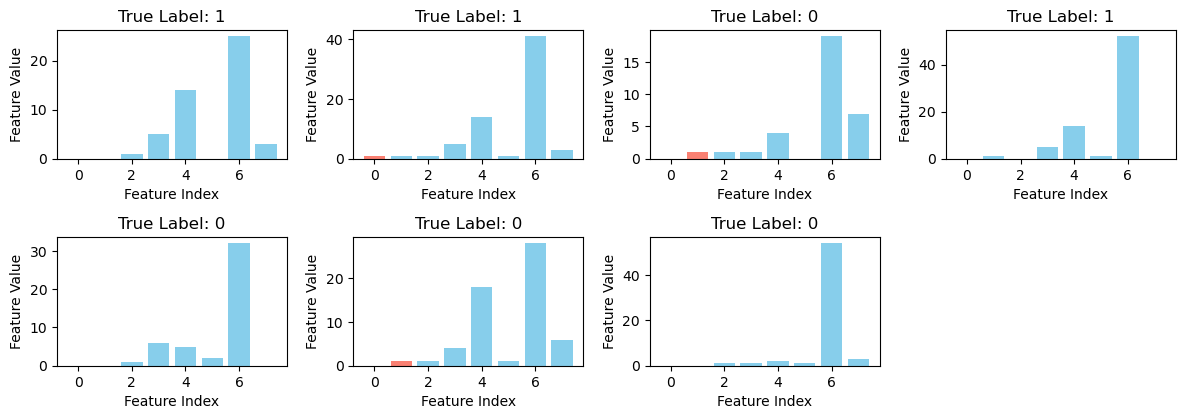

In [10]:
from sklearn.model_selection import GridSearchCV

# Step 4: Hyperparameter Tuning using Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:")
print(grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# Step 5: Evaluate the best model
train_accuracy = best_svm_model.score(X_train_scaled, y_train)
test_accuracy = best_svm_model.score(X_test_scaled, y_test)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Step 6: Error Analysis
# Find misclassified instances
misclassified_idx = np.where(y_test != best_svm_model.predict(X_test_scaled))[0]
misclassified_samples = X_test.iloc[misclassified_idx]

print("\nNumber of misclassified instances:", len(misclassified_idx))
print("\nMisclassified samples:")
print(misclassified_samples)

import numpy as np
import matplotlib.pyplot as plt

# Find the index of the "Income" feature
income_index = X.columns.get_loc('Income')

# Visualize misclassified instances with the misclassified feature colored differently
plt.figure(figsize=(12, 8))
for i, sample in enumerate(misclassified_samples.values):
    ax = plt.subplot(4, 4, i+1)
    bar_colors = ['skyblue'] * (len(sample) - 1)  # Colors for all bars except the misclassified one
    true_label = y_test.iloc[misclassified_idx[i]]
    predicted_label = best_svm_model.predict(X_test_scaled)[misclassified_idx[i]]
    if true_label != predicted_label:
        bar_colors[predicted_label] = 'salmon'  # Color the bar representing the misclassified feature
    ax.bar(range(len(sample)-1), sample[np.arange(len(sample)) != income_index], color=bar_colors)
    plt.title(f'True Label: {true_label}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
plt.tight_layout()
plt.show()


In [11]:
# Evaluate the model
train_accuracy = svm_model.score(X_train_scaled, y_train)
test_accuracy = svm_model.score(X_test_scaled, y_test)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.8617021276595744
Testing accuracy: 0.7083333333333334


In [12]:
# Step 5: Evaluate the model
y_pred_train = svm_model.predict(X_train_scaled)
y_pred_test = svm_model.predict(X_test_scaled)


In [13]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.69      0.75      0.72        12

    accuracy                           0.71        24
   macro avg       0.71      0.71      0.71        24
weighted avg       0.71      0.71      0.71        24



In [14]:
# Feature Importance (Coefficients)
coef_importance = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': svm_model.coef_[0]})
coef_importance = coef_importance.sort_values(by='Coefficient', ascending=False)
print("\nTop Significant Features:")
print(coef_importance)


Top Significant Features:
      Feature  Coefficient
0      Income     1.247204
3  Home Owner     0.532753
7         Age     0.036329
5       Model     0.009360
6      Gender    -0.017822
4        Make    -0.025988
8      Colour    -0.036095
2    Employed    -0.263581
1        Area    -1.769969


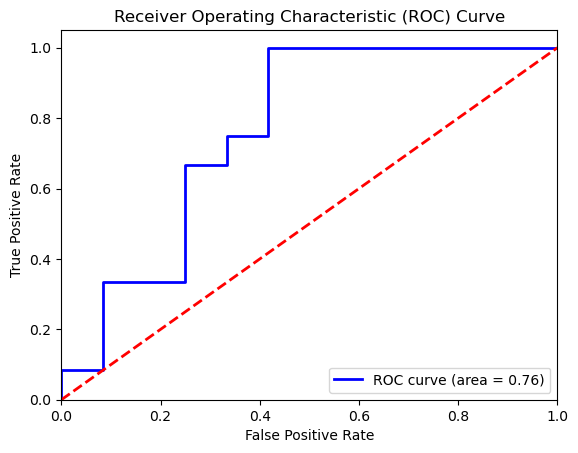

In [15]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

the blue line represents the ROC curve of the model, and the red dashed line represents the reference line (random guessing). The fact that the blue line is closer to the top-left corner indicates good model performance.

In [16]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[8 4]
 [3 9]]


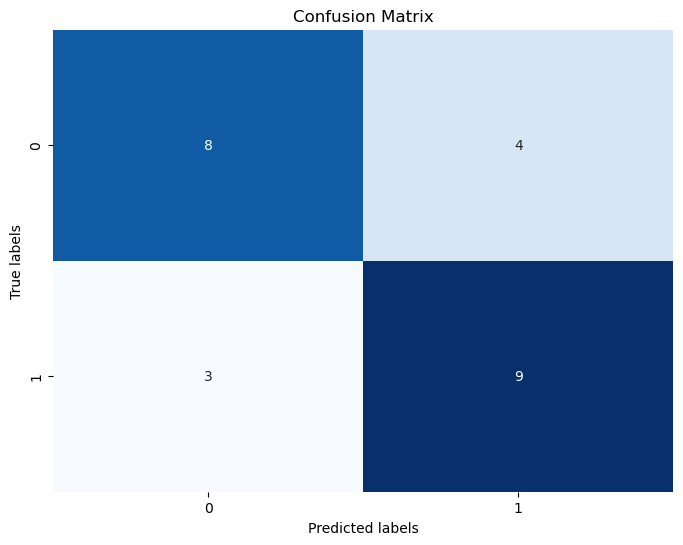

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

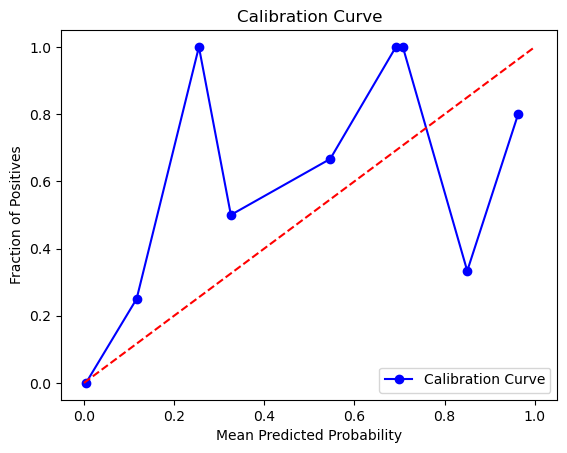

In [18]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

# Calibrate SVM model using Platt scaling
calibrated_svc = CalibratedClassifierCV(svm_model, method='sigmoid', cv='prefit')
calibrated_svc.fit(X_train_scaled, y_train)

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, calibrated_svc.predict_proba(X_test_scaled)[:, 1], n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', color='blue', label='Calibration Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend(loc='lower right')
plt.show()



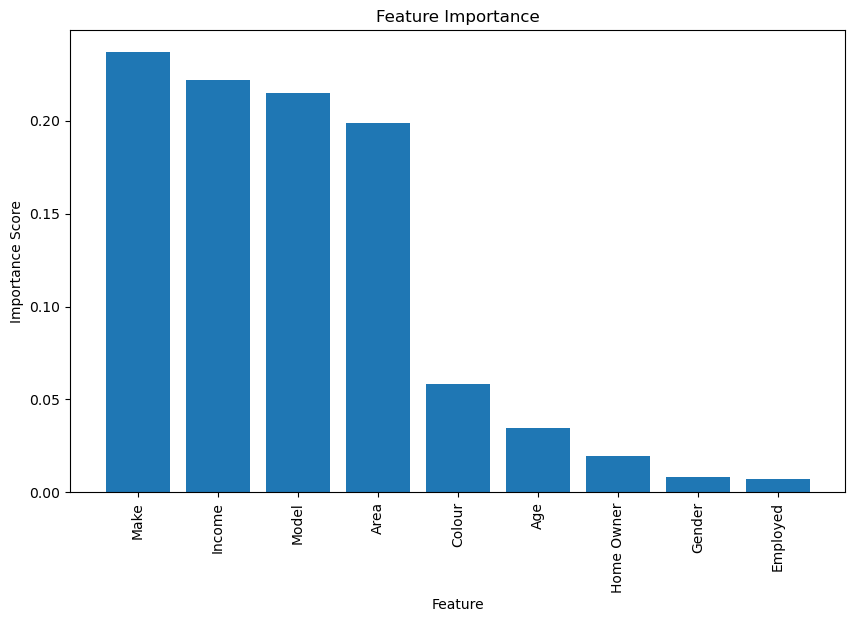

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Feature Importance
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = df.columns[:-1]  
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), features[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()